In [20]:
import pandas as pd

import numpy as np

from scipy.stats import pearsonr, linregress

import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf

import sqlite3

import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1, rc={"lines.linewidth": 1, "figure.figsize" : (13,6)})

In [18]:

gdp_cols = ['gdp', 'gdpdelta', 'gdp%change']
lforce_cols = ['lforce', 'lforcedelta', 'lforce%change']
unemp_cols = ['unemp', 'unempdelta', 'unemp%change']
inflation_cols = ['inflation', 'inflationdelta', 'inflation%change']

sample = ['Argentina', 'Brazil', 'Mexico', 'Chile']

## Trendlines for Economic Indicators
In the interest of legibility, we displayed the trendlines for a small subset of LatAm countries.  To see trends for all countries, simply remove the .loc line.

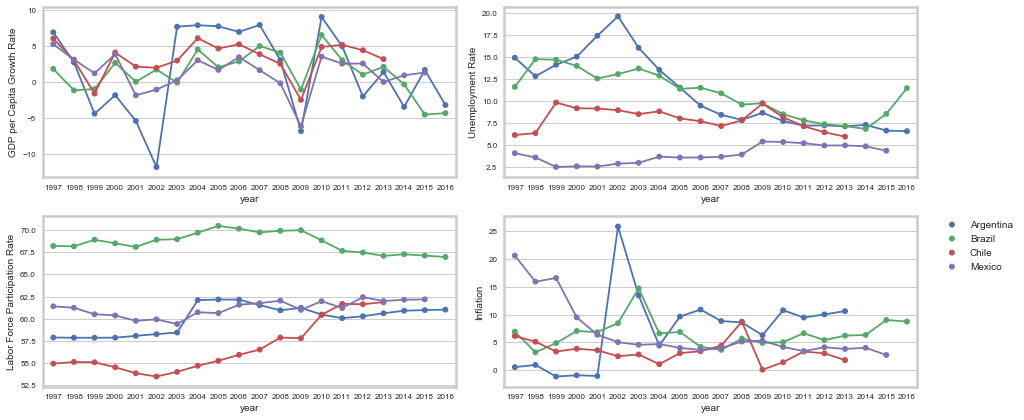

In [33]:
economic = pd.read_csv("data/clean_latam.csv", usecols = ['ctry', 'year', 'gdp', 'unemp',
                                                   'lforce', 'inflation'])

economic = economic.loc[economic['ctry'].isin(sample)]

import matplotlib as mpl
tick_size = 8
axes_size = 10
mpl.rcParams['xtick.labelsize'] = tick_size 
mpl.rcParams['ytick.labelsize'] = tick_size 
mpl.rcParams['axes.labelsize'] = axes_size

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = False)


axgdp = sns.pointplot(data = economic, x="year", y = "gdp", hue="ctry",  ax=axes[0,0])
axunemp = sns.pointplot(data = economic, x="year", y = "unemp", hue="ctry",  ax=axes[0,1])
axlforce = sns.pointplot(data = economic, x="year", y = "lforce", hue="ctry", ax=axes[1,0])
axinflation = sns.pointplot(data = economic, x="year", y = "inflation", hue="ctry",  ax=axes[1,1])

axgdp.set_ylabel("GDP per Capita Growth Rate")
axunemp.set_ylabel("Unemployment Rate")
axlforce.set_ylabel("Labor Force Participation Rate")
axinflation.set_ylabel("Inflation")

axgdp.legend_.remove()
axunemp.legend_.remove()
axlforce.legend_.remove()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()


plt.tight_layout()

For most parts of it, the economic performance of the subset countries appear to move in tandem.  GDP per Capita Growth rate and inflation seem to be most affected by external conditions (2002 tech bubble and 2009 financial crisis).  At the broad level, labor factors are improving, but we do not see a discernible trend in economic performance.  



### Trendlines for all products tariffs 
In the interest of legibility, we displayed the trendlines for a small subset of LatAm countries.  To see trends for all countries, simply remove the .loc line.

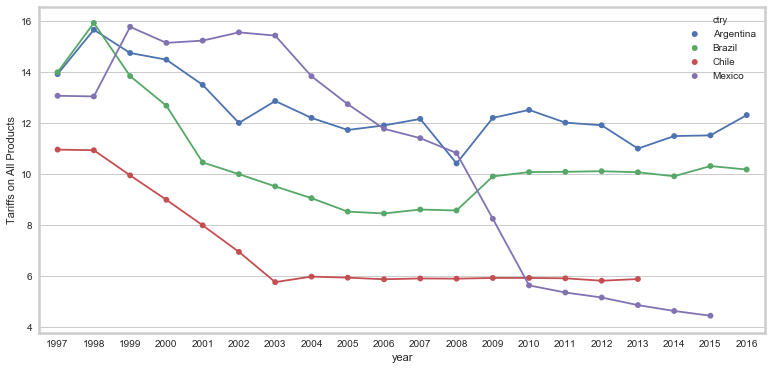

In [21]:
ap = pd.read_csv("data/clean_latam.csv", usecols = ['ctry', 'year', 'All Products_tariff'])

ap = ap.loc[ap['ctry'].isin(sample)]

g = sns.pointplot(x="year", y="All Products_tariff", hue="ctry", data=ap, size=4, aspect=2)

g.set_ylabel("Tariffs on All Products")

### Trendlines for subset tariffs 


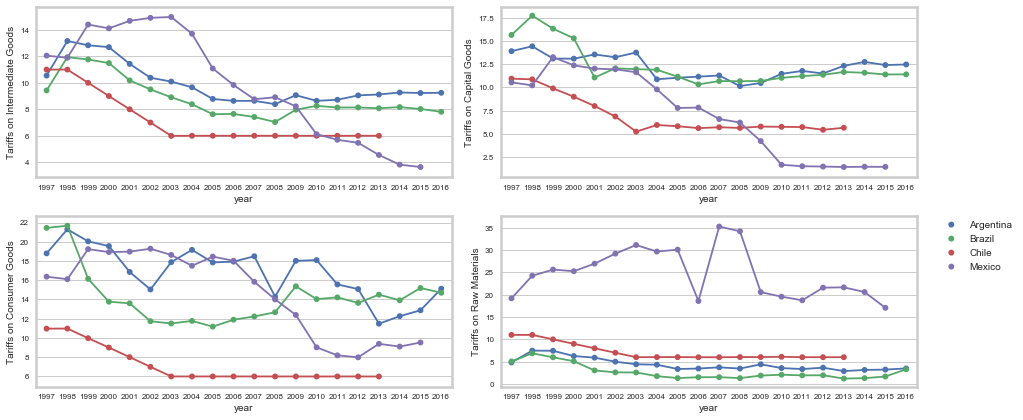

In [30]:
ig = pd.read_csv("data/clean_latam.csv", usecols = ['ctry', 'year', 'Intermediate goods_tariff', 'Capital goods_tariff',
                                                   'Consumer goods_tariff', 'Raw materials_tariff'])

ig = ig.loc[ig['ctry'].isin(sample)]


import matplotlib as mpl
tick_size = 8
axes_size = 10
mpl.rcParams['xtick.labelsize'] = tick_size 
mpl.rcParams['ytick.labelsize'] = tick_size 
mpl.rcParams['axes.labelsize'] = axes_size

 
fig, axes = plt.subplots(nrows=2, ncols=2, sharey = False)

axig = sns.pointplot(data = ig, x="year", y = "Intermediate goods_tariff", hue="ctry",  ax=axes[0,0])
axkg = sns.pointplot(data = ig, x="year", y = "Capital goods_tariff", hue="ctry",  ax=axes[0,1])
axcg = sns.pointplot(data = ig, x="year", y = "Consumer goods_tariff", hue="ctry", ax=axes[1,0])
axrm = sns.pointplot(data = ig, x="year", y = "Raw materials_tariff", hue="ctry",  ax=axes[1,1])

axig.set_ylabel("Tariffs on Intermediate Goods")
axkg.set_ylabel("Tariffs on Capital Goods")
axcg.set_ylabel("Tariffs on Consumer Goods")
axrm.set_ylabel("Tariffs on Raw Materials")

axig.legend_.remove()
axkg.legend_.remove()
axcg.legend_.remove()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

Tariffs have mostly been declining since the early 2000's. This was expected as LatAm countries continued to liberalize trade.  Mexico's high raw material tariffs are mostly due to tariffs on imports from North America and African countries.  